# Segmentation

In [22]:
import pandas as pd
import seaborn as sns

# Load the Excel file
data_path = ("social_media_engagement_data.xlsx")
data = pd.read_excel(data_path)

In [23]:
from scipy.stats import ttest_ind

mask = data['Influencer ID'].notna()
with_influencer = data[mask]
without_influencer = data[~mask]
ttest_ind(with_influencer['Likes'], without_influencer['Likes'])

TtestResult(statistic=-0.36606047786908863, pvalue=0.7143207222182716, df=99998.0)

<Axes: xlabel='Post Timestamp'>

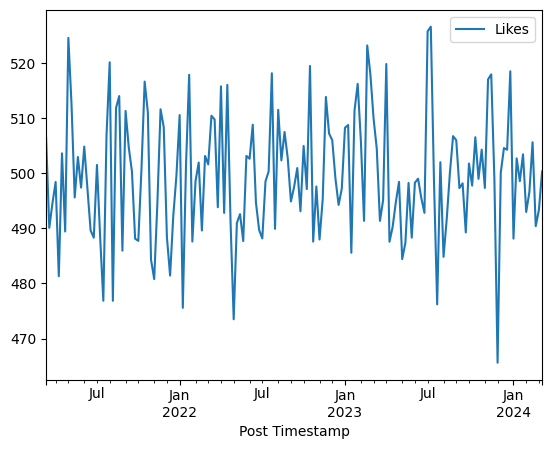

In [24]:
total_likes = data.groupby('Post Timestamp')[['Likes']].sum().resample('W').mean()

total_likes.plot()

<Axes: xlabel='Post Timestamp'>

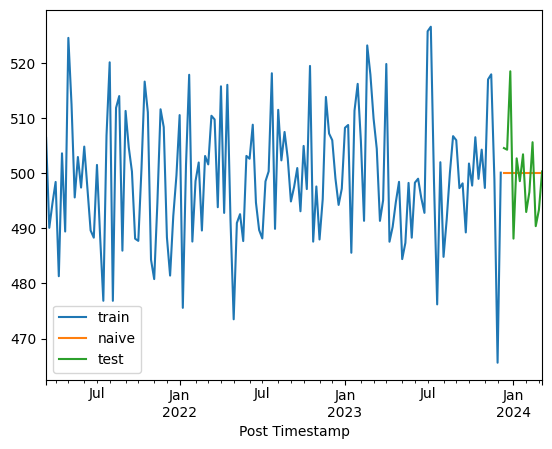

In [25]:
total_likes_train, total_likes_test = total_likes[:-13], total_likes[-13:]

naive_forecast = total_likes_test.copy()
naive_forecast['Likes'] = total_likes_train['Likes'].iloc[-1]

forecast_fin = pd.concat([total_likes_train, naive_forecast, total_likes_test], axis=1)
forecast_fin.columns = ['train', 'naive', 'test']
forecast_fin.plot()

In [26]:
forecast_fin.to_excel('forecast_data.xlsx')

NameError: name 'plt' is not defined

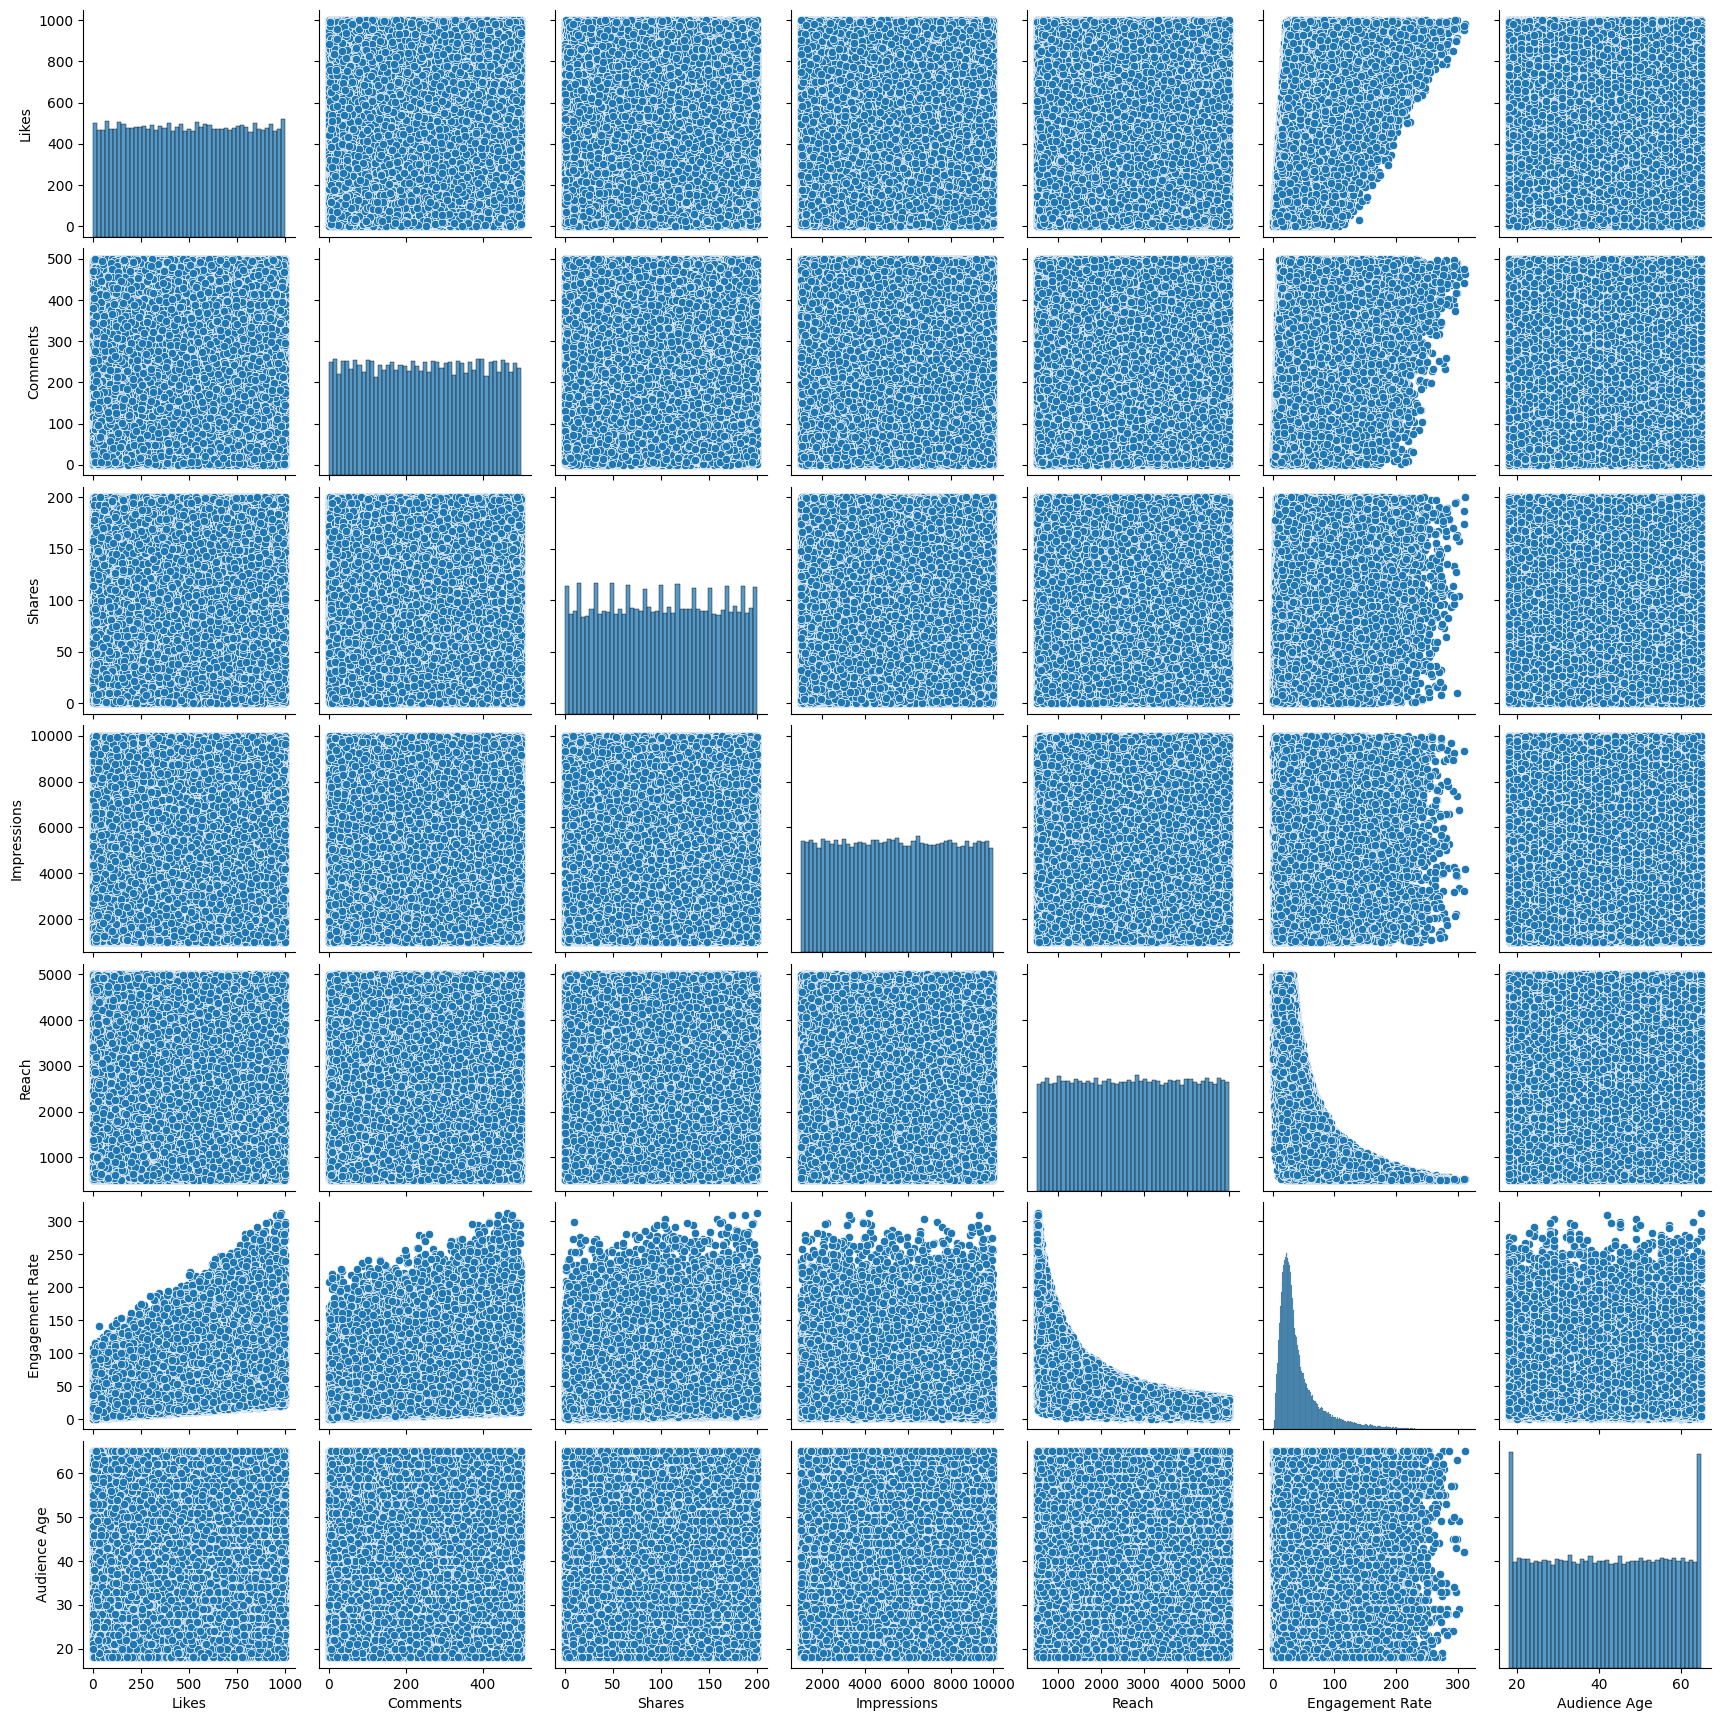

In [27]:
sns.pairplot(data)
plt.show()

In [ ]:
import pandas as pd

# Load the Excel file
data_path = ("social_media_engagement_data.xlsx")
data = pd.read_excel(data_path)

# Display the first few rows of the dataframe
print(data.head())

# EDA Section


In [ ]:
df=pd.read_excel("social_media_engagement_data.xlsx")

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
data_path = ("social_media_engagement_data.xlsx")
data = pd.read_excel(data_path)

# Plotting the age distribution
plt.figure(figsize=(10, 5))
sns.histplot(data['Audience Age'].dropna(), bins=20, kde=True)  # KDE will add a density curve
plt.title('Distribution of Audience Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plotting the gender distribution
gender_counts = data['Audience Gender'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Audience Gender Distribution')
plt.show()





# Applied Section

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract 'Audience Location' data
location_text = ' '.join(data['Audience Location'].dropna().astype(str))

# Create the word cloud
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = None,  # We typically don't filter out common locations but you could if there are repetitive non-informative entries
                      min_font_size = 10).generate(location_text)

# Display the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

